In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin,clone,ClassifierMixin
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew #for some statistics
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/bios 611 final project revised.py
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/.DS_Store
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/project_structure.md
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/Dockerfile
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/makefile
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/bios 611 final project revised.ipynb
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/requirement.txt
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/main.py
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/output/.DS_Store
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/output/tables/train_blood_pressure_split.csv
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/output/tables/sex_distribution.csv
/Users/shuqizhang/Documents/zsq/UNC/BIOS 611/final_project/output/tables/cross_validation_results.csv
/Users

In [2]:
train=pd.read_csv('data/original_data/train.csv')
test=pd.read_csv('data/original_data/test.csv')
sample_submission=pd.read_csv('data/original_data/sample_submission.csv')

In [3]:
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,0.138443,184066,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,0.369552,211755,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,8.646334,252203,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,1.107884,121954,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,1.337570,180121,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1


In [4]:
# Split  "/" Blood pressure
train[['Systolic Blood Pressure','Diastolic Blood Pressure']] = train['Blood Pressure'].str.split('/',expand=True)
train.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic Blood Pressure,Diastolic Blood Pressure
0,RDG0550,33,Male,200,129/90,48,0,1,1,1,...,30.449815,63,6,7,Argentina,South America,Southern Hemisphere,1,129,90
1,NMA3851,56,Female,262,159/105,46,1,0,1,0,...,34.973685,333,7,8,Nigeria,Africa,Northern Hemisphere,1,159,105
2,TUI5807,19,Female,140,161/109,54,0,1,0,0,...,30.554246,537,2,10,Thailand,Asia,Northern Hemisphere,0,161,109
3,YYT5016,50,Female,163,120/62,53,0,1,1,1,...,35.390265,591,0,9,Spain,Europe,Southern Hemisphere,1,120,62
4,ZAC5937,89,Female,144,153/110,92,1,0,1,0,...,39.575483,145,2,5,Germany,Europe,Northern Hemisphere,1,153,110


In [5]:
test.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere
1,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,4,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere
2,RQX1211,60,Male,145,160/98,71,1,0,1,0,...,8,5.994228,234966,29.162319,247,7,7,Canada,North America,Northern Hemisphere
3,RVN4963,45,Male,294,130/84,66,0,0,1,1,...,9,7.007392,216565,25.120605,360,4,6,France,Europe,Northern Hemisphere
4,NCU1956,36,Male,133,161/90,97,1,0,1,1,...,10,10.963544,223132,22.386804,605,5,10,Canada,North America,Northern Hemisphere


In [6]:
# missing value
train.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
Systolic Blood Pressure            0
D

In [7]:
###Overall heart attack risk## 
round(100*train['Heart Attack Risk'].value_counts() / train.shape[0], 2) 

Heart Attack Risk
0    64.28
1    35.72
Name: count, dtype: float64

In [8]:
###Age distribution## 
train['Age'].describe()

count    7010.000000
mean       53.510414
std        21.290957
min        18.000000
25%        35.000000
50%        53.000000
75%        72.000000
max        90.000000
Name: Age, dtype: float64

In [9]:
###Sex distribution## 
round(100*train['Sex'].value_counts() / train.shape[0], 2) 

Sex
Male      69.77
Female    30.23
Name: count, dtype: float64

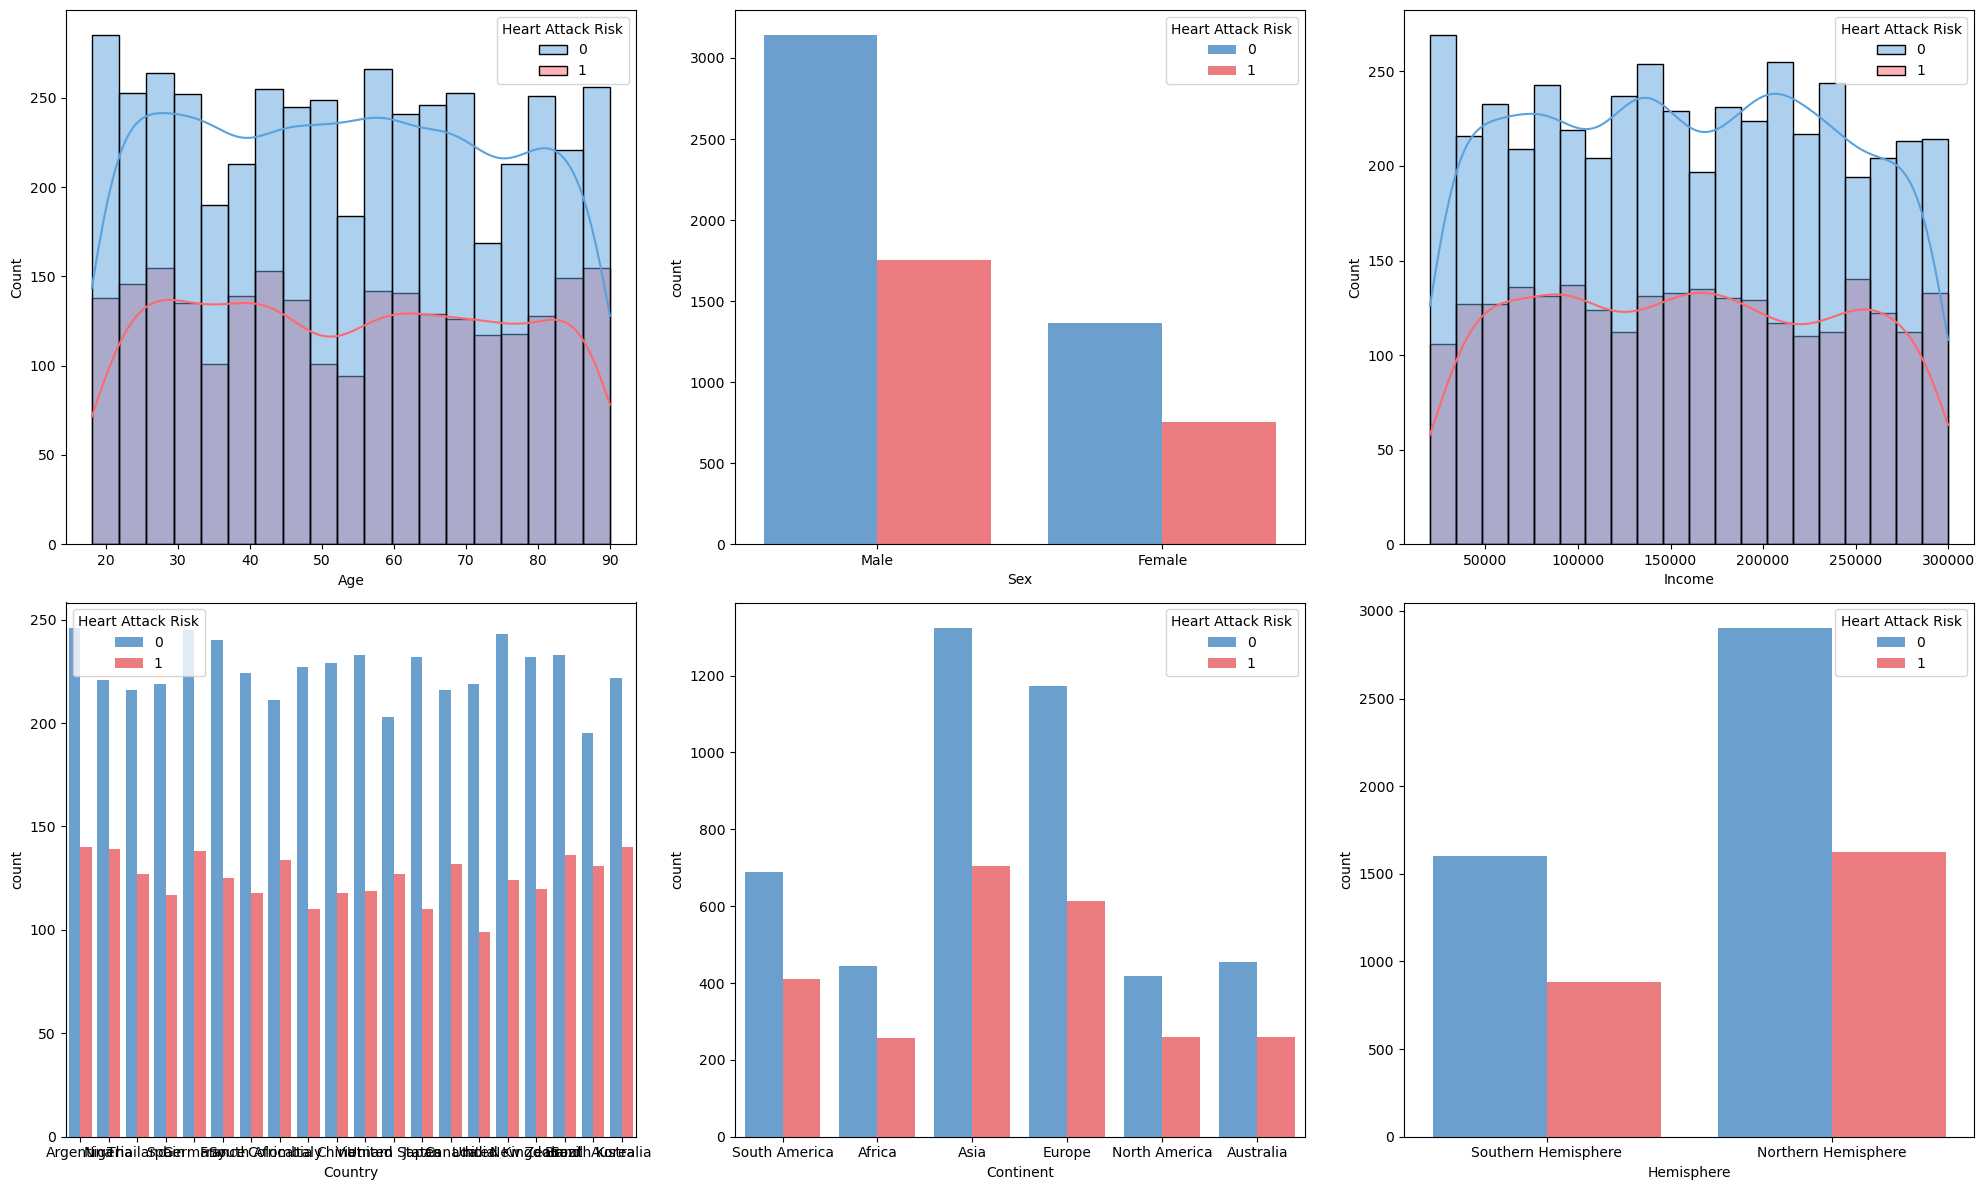

In [10]:
# Data visualization 1 Socio-demographics
# Define your color palette with pink and blue
palette = ['#5aa2de', '#ff696e']  # Pink and Blue colors

# Set up the subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Create the plots with the custom palette
sns.histplot(train, x='Age', hue='Heart Attack Risk', kde=True, ax=axes[0, 0], palette=palette)
sns.countplot(data=train, x='Sex', hue='Heart Attack Risk', ax=axes[0, 1], palette=palette)
sns.histplot(train, x='Income', hue='Heart Attack Risk', kde=True, ax=axes[0, 2], palette=palette)
sns.countplot(train, x='Country', hue='Heart Attack Risk', ax=axes[1, 0], palette=palette)
sns.countplot(train, x='Continent', hue='Heart Attack Risk', ax=axes[1, 1], palette=palette)
sns.countplot(data=train, x='Hemisphere', hue='Heart Attack Risk', ax=axes[1, 2], palette=palette)

# Display the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Triglycerides', ylabel='Count'>

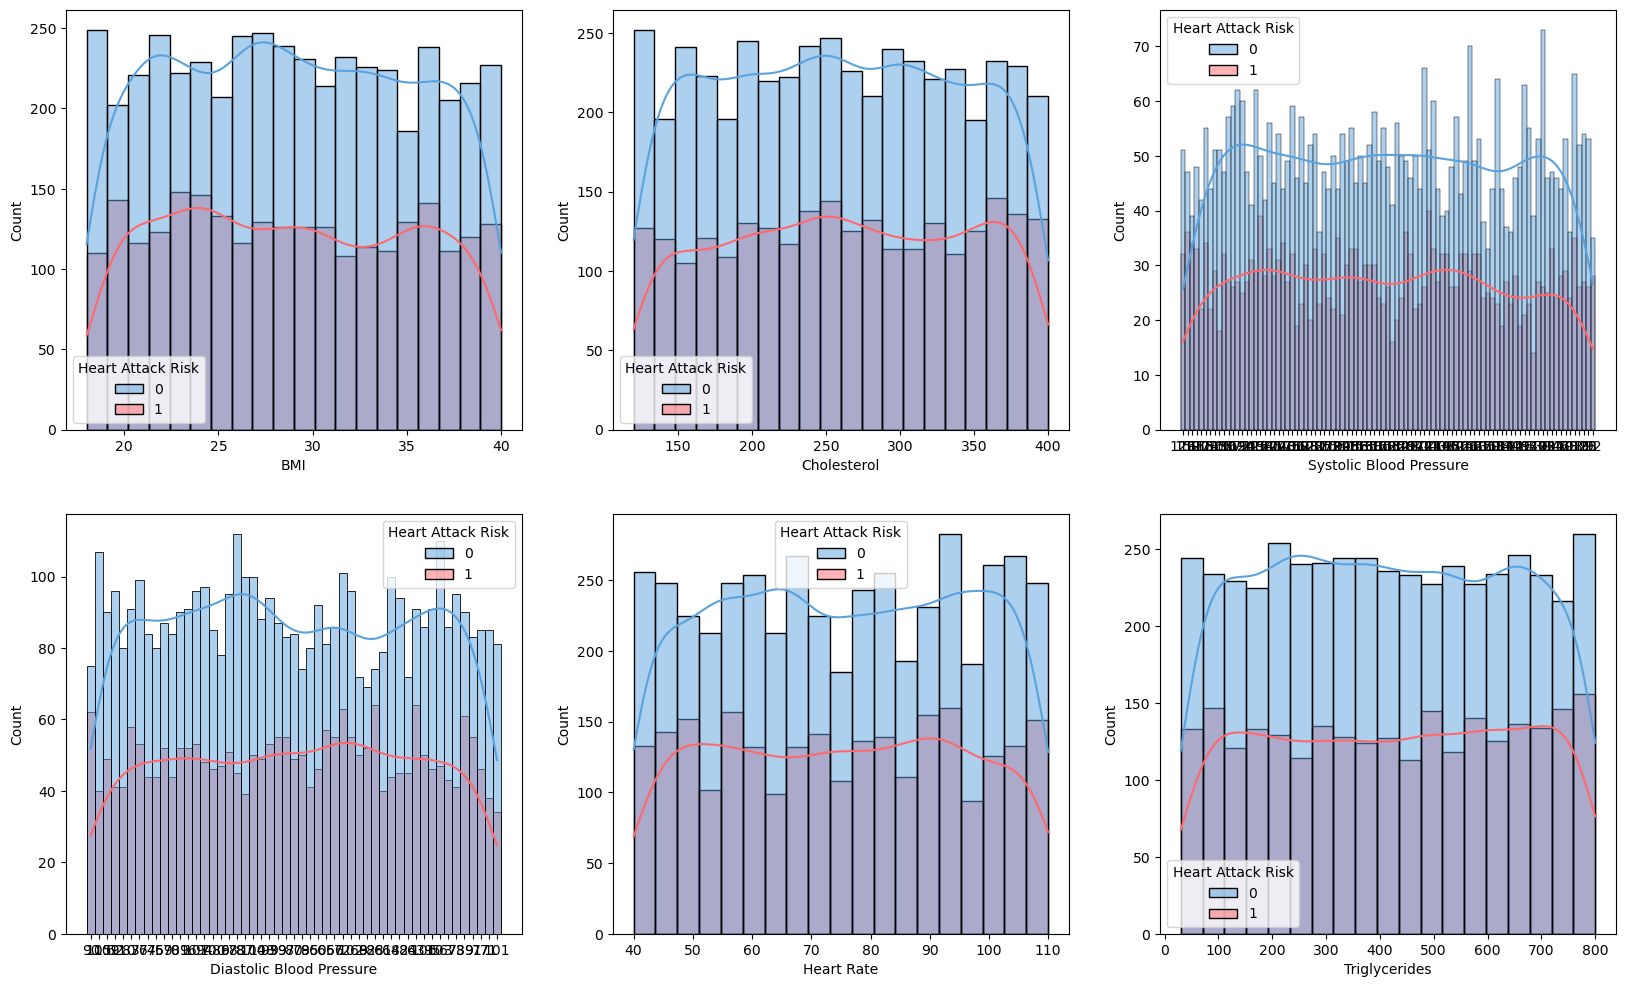

In [35]:
# Data visualization 2 Clinical Characteristics

fig, axes = plt.subplots(2, 3, figsize = (20, 12))
sns.histplot(train,x='BMI',hue='Heart Attack Risk',kde=True, ax = axes[0, 0], palette=palette)
sns.histplot(train,x='Cholesterol',hue='Heart Attack Risk',kde=True, ax = axes[0, 1], palette=palette)
sns.histplot(train, x='Systolic Blood Pressure', hue='Heart Attack Risk', kde=True, ax=axes[0, 2], palette=palette)
sns.histplot(train,x='Diastolic Blood Pressure',hue='Heart Attack Risk',kde=True, ax = axes[1, 0], palette=palette)
sns.histplot(train,x='Heart Rate',hue='Heart Attack Risk', kde=True, ax = axes[1, 1], palette=palette)
sns.histplot(train,x='Triglycerides',hue='Heart Attack Risk',kde=True, ax = axes[1, 2], palette=palette)


<Axes: xlabel='Sleep Hours Per Day', ylabel='Count'>

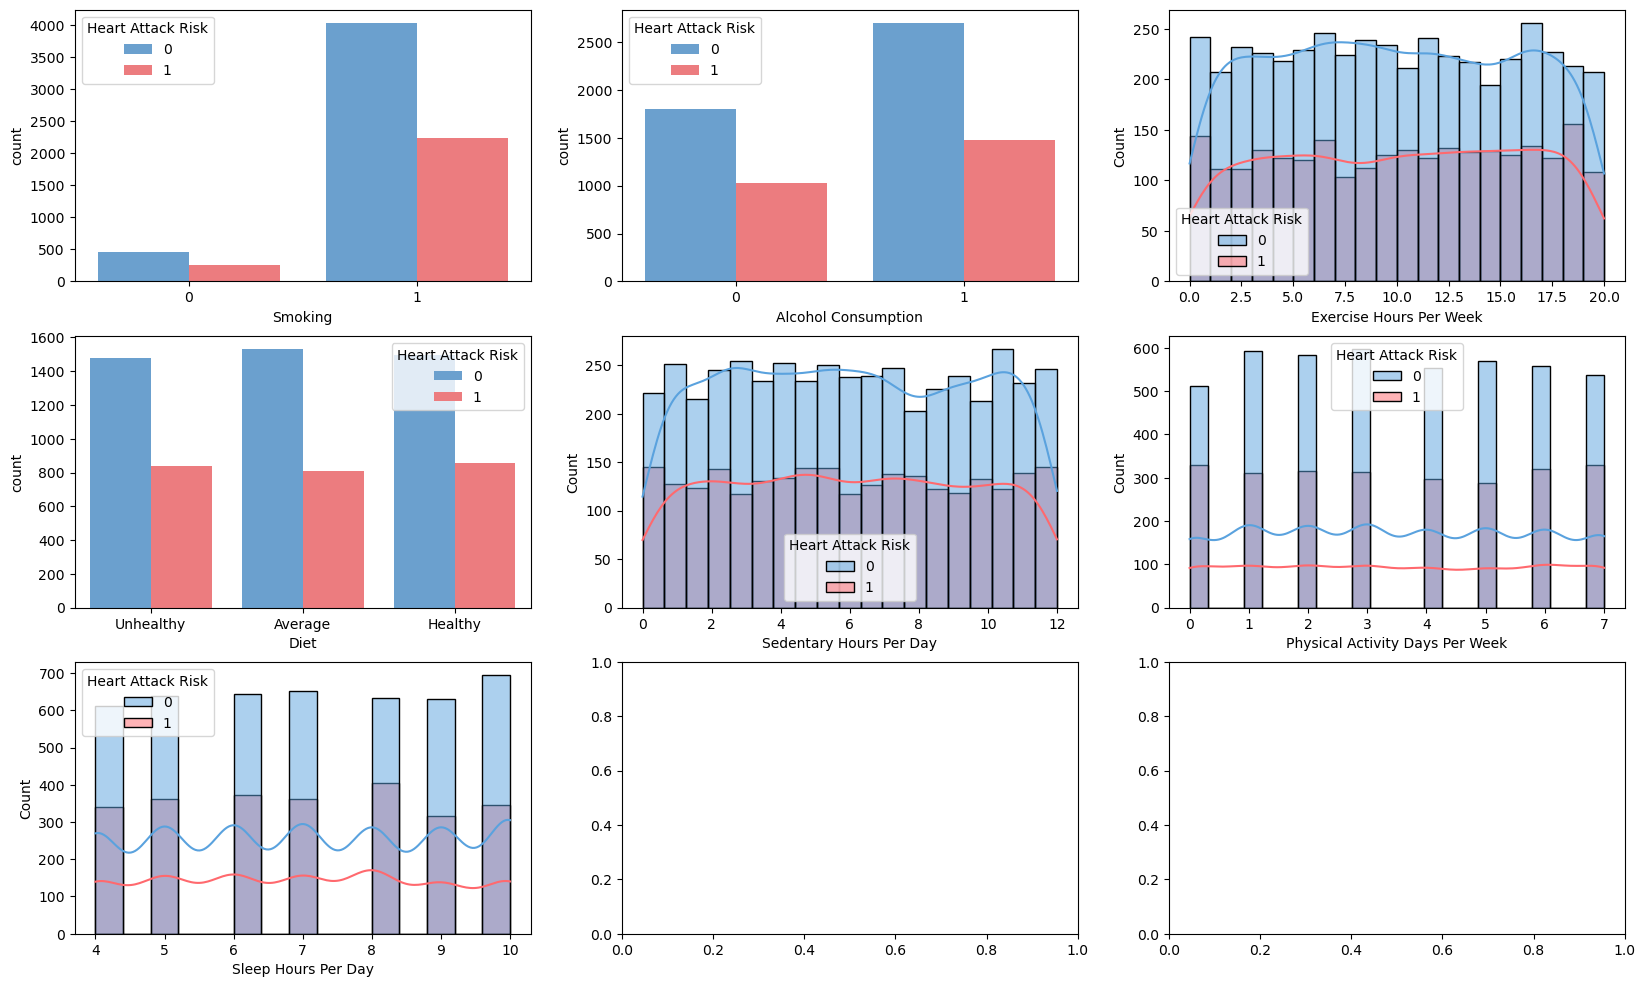

In [12]:
# Data visualization 3 Lifestyle and bahaviors
fig, axes = plt.subplots(3, 3, figsize = (20, 12))
sns.countplot(data=train, x='Smoking', hue='Heart Attack Risk', ax = axes[0, 0], palette=palette)
sns.countplot(data=train, x='Alcohol Consumption', hue='Heart Attack Risk', ax = axes[0, 1], palette=palette)
sns.histplot(train,x='Exercise Hours Per Week',hue='Heart Attack Risk',kde=True, ax = axes[0, 2], palette=palette)
sns.countplot(data=train, x='Diet', hue='Heart Attack Risk', ax = axes[1, 0], palette=palette)
sns.histplot(train,x='Sedentary Hours Per Day',hue='Heart Attack Risk',kde=True, ax = axes[1, 1], palette=palette)
sns.histplot(train,x='Physical Activity Days Per Week',hue='Heart Attack Risk',kde=True, ax = axes[1, 2], palette=palette)
sns.histplot(train,x='Sleep Hours Per Day',hue='Heart Attack Risk',kde=True, ax = axes[2, 0], palette=palette)


<Axes: xlabel='Family History', ylabel='count'>

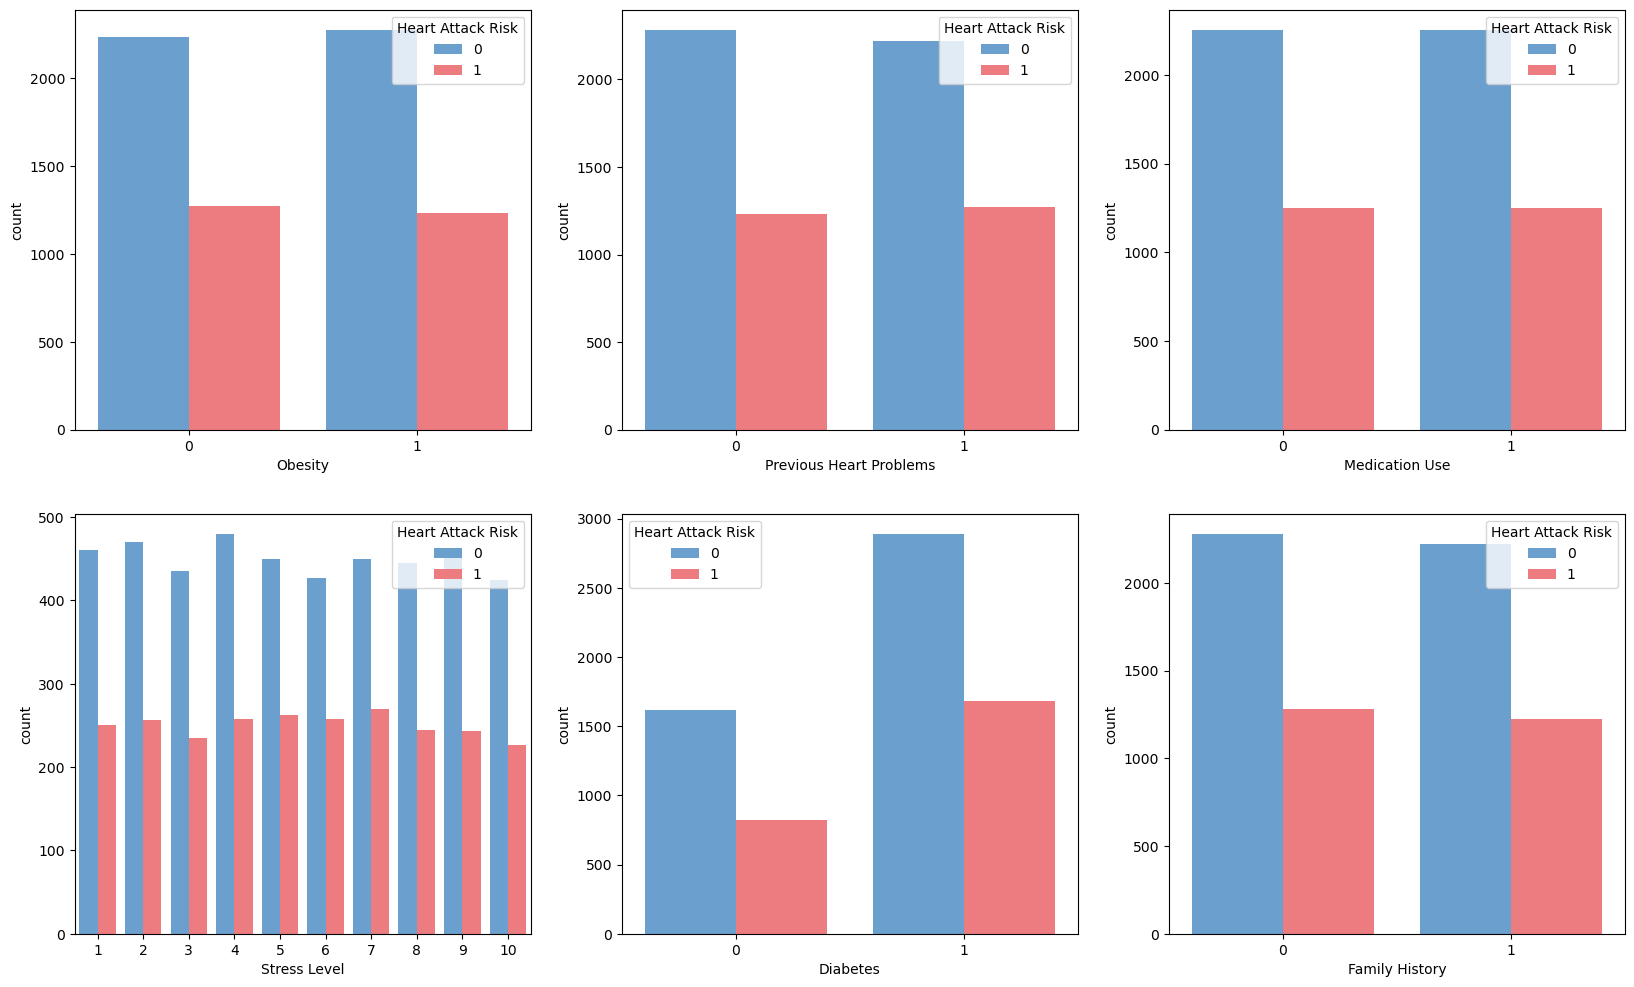

In [13]:
# Data visualization 4 comobidities
fig, axes = plt.subplots(2, 3, figsize = (20, 12))
sns.countplot(data=train, x='Obesity', hue='Heart Attack Risk', ax = axes[0, 0], palette=palette)
sns.countplot(data=train, x='Previous Heart Problems', hue='Heart Attack Risk', ax = axes[0, 1], palette=palette)
sns.countplot(data=train, x='Medication Use', hue='Heart Attack Risk', ax = axes[0, 2], palette=palette)
sns.countplot(data=train, x='Stress Level', hue='Heart Attack Risk', ax = axes[1, 0], palette=palette)
sns.countplot(data=train, x='Diabetes', hue='Heart Attack Risk', ax = axes[1, 1], palette=palette)
sns.countplot(train,x='Family History',hue='Heart Attack Risk',ax = axes[1, 2], palette=palette)

In [14]:
# Process data
train['Diet'] = train['Diet'].replace({'Unhealthy':0,'Average':1,'Healthy':2})
train['Sex'] = train['Sex'].replace({'Male':0,'Female':1})
train['Continent'] = train['Continent'].replace({'South America':0,'Africa':1,'Asia':2,'Europe':3,'North America':4,'Australia':5})
train['Hemisphere'] = train['Hemisphere'].replace({'Southern Hemisphere':0,'Northern Hemisphere':1})
train = train.drop(columns=['Patient ID','Blood Pressure','Country'], axis = 1) # these three variable won't be used in models.

/var/folders/vz/1mv81j7x4vs_hk9ryd7hbp2m0000gn/T/ipykernel_10342/718692126.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Diet'] = train['Diet'].replace({'Unhealthy':0,'Average':1,'Healthy':2})
/var/folders/vz/1mv81j7x4vs_hk9ryd7hbp2m0000gn/T/ipykernel_10342/718692126.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Sex'] = train['Sex'].replace({'Male':0,'Female':1})
/var/folders/vz/1mv81j7x4vs_hk9ryd7hbp2m0000gn/T/ipykernel_10342/718692126.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated 

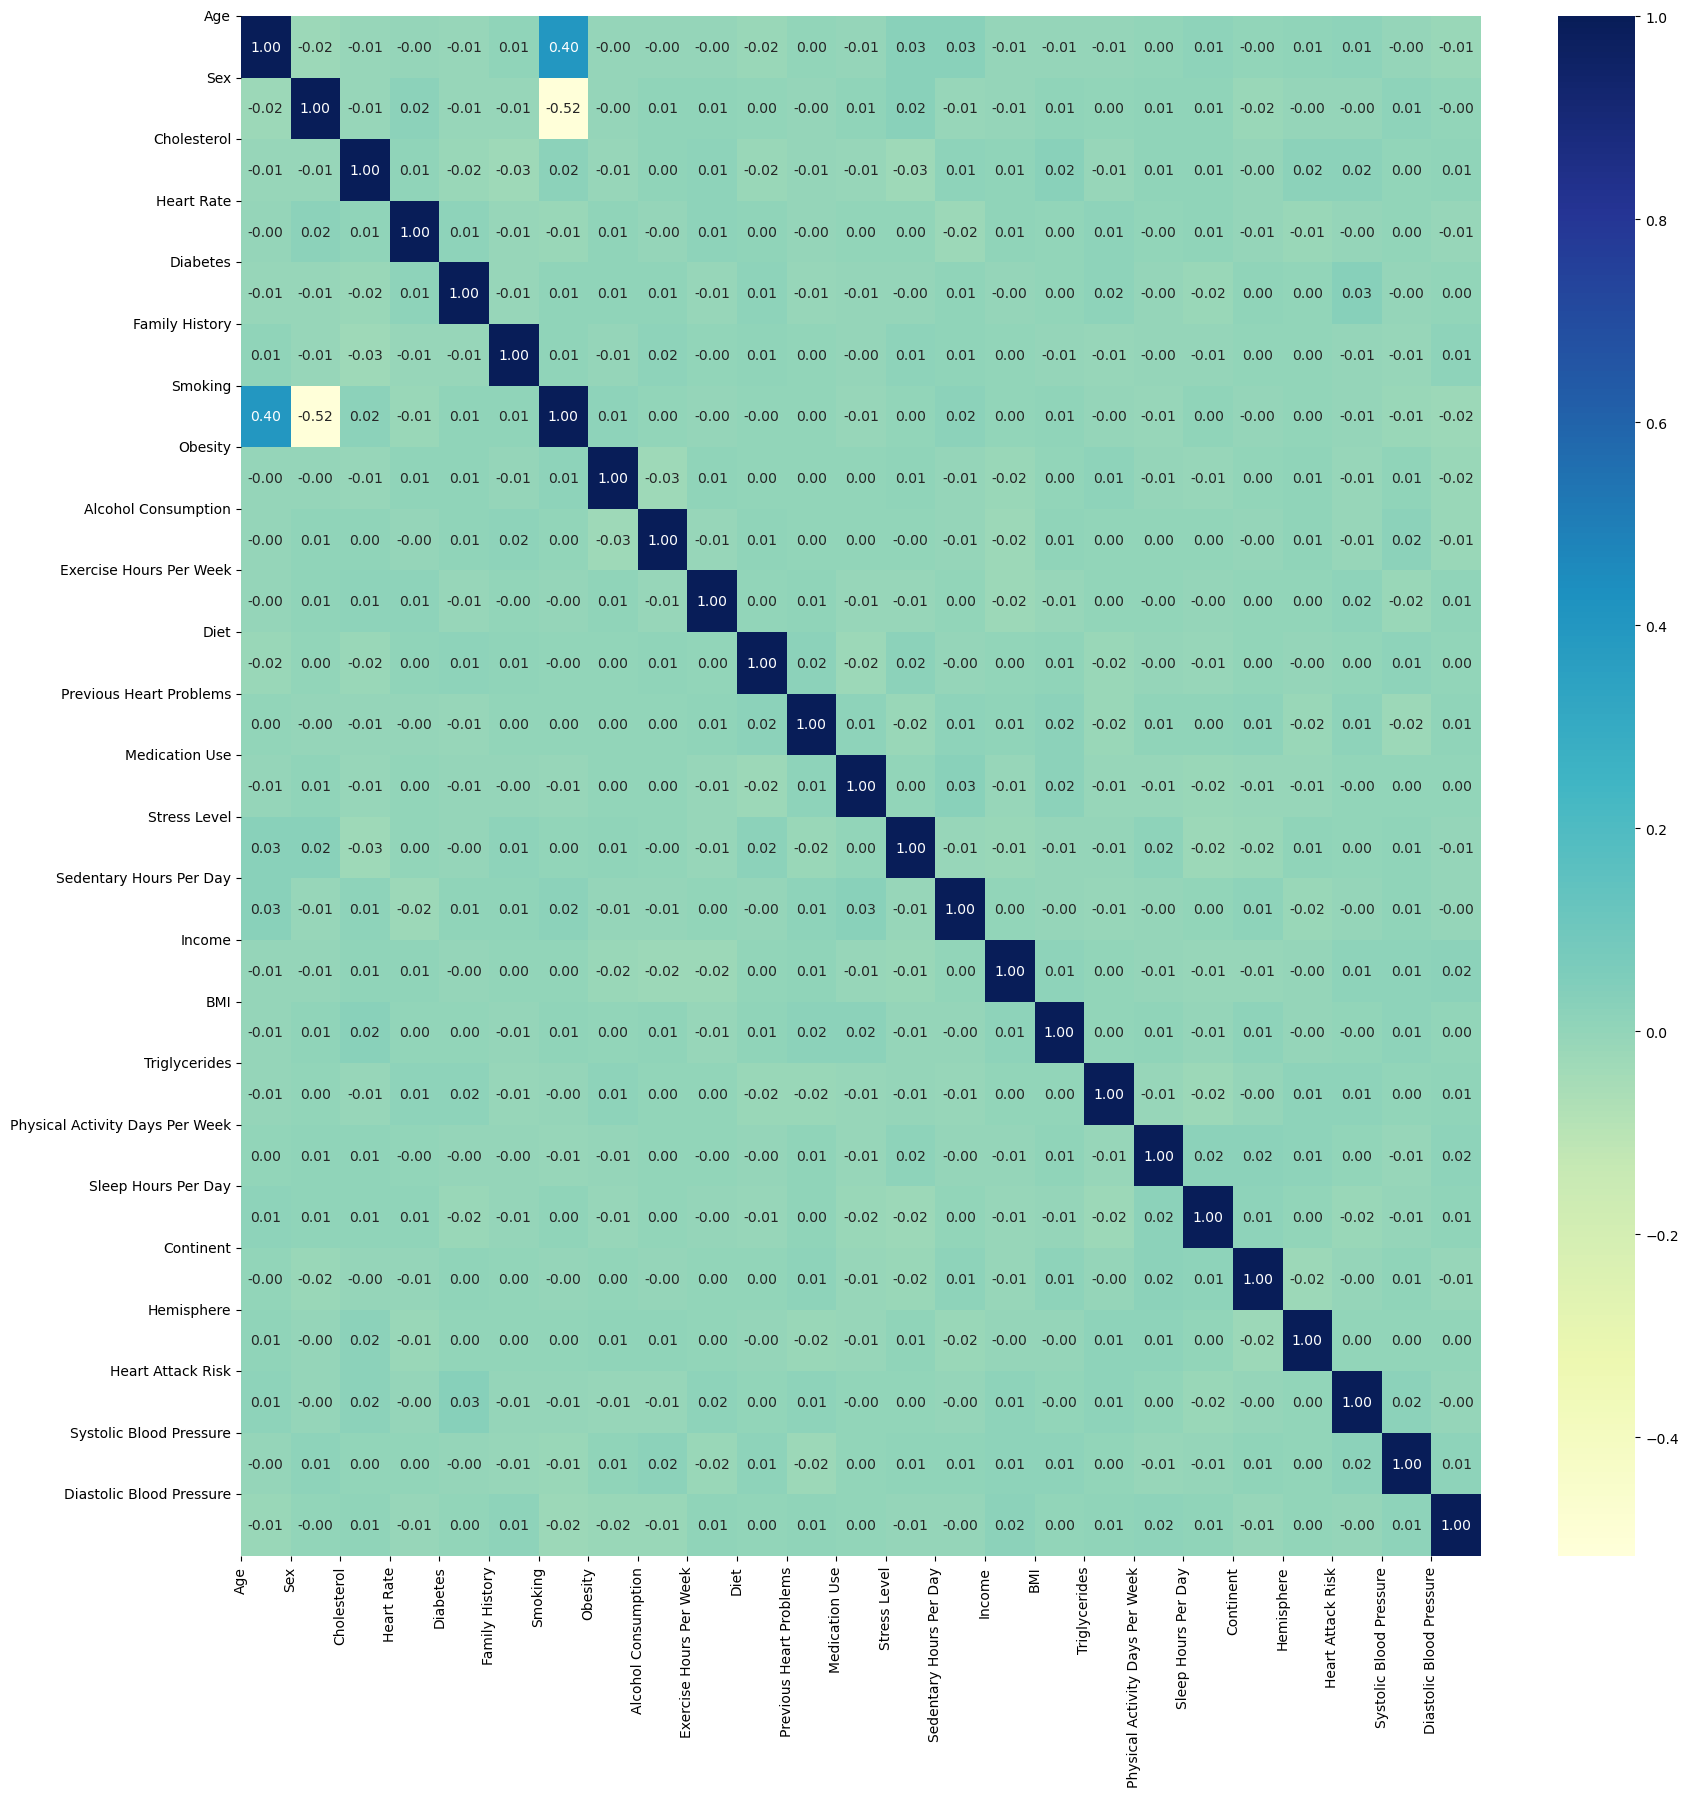

In [15]:
#Correlation Matrix with Heatmap
#method:pearson
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()
# age and sex is strongly correlated with smoking and obesity.

In [16]:
# Split traning dataset into train and evaluation dataset
X= train.drop(columns=["Heart Attack Risk"],axis=1)
y= train["Heart Attack Risk"]
X_train= train.drop(columns=["Heart Attack Risk"],axis=1)
y_train= train["Heart Attack Risk"]
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2,random_state=2024)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (5608, 24)
Shape of X_eval:  (1402, 24)
Shape of y_train:  (5608,)
Shape of y_eval (1402,)


In [17]:
StandardScaler = StandardScaler()  
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X=pd.DataFrame(X)
X_train

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.312647,-0.658436,0.027212,0.098507,0.732994,-0.974296,0.339311,-1.001070,0.831688,-1.154718,...,-0.873864,0.988341,1.580102,-0.608957,-1.089059,0.490111,-0.908440,0.737311,0.383915,-0.825922
1,0.628483,-0.658436,1.620218,-0.926493,-1.364267,1.026382,0.339311,-1.001070,0.831688,-1.734693,...,0.524325,0.024631,-0.296379,-1.232889,-1.089059,0.490111,-0.908440,0.737311,-1.104938,1.346132
2,-0.312647,-0.658436,-1.615189,0.147316,0.732994,1.026382,0.339311,0.998931,-1.202374,-1.395240,...,0.875115,0.665673,-0.515514,1.187077,-0.208961,-1.525687,-0.908440,-1.356279,-0.875883,-0.486538
3,1.004936,-0.658436,-0.046881,0.488983,0.732994,1.026382,0.339311,-1.001070,0.831688,1.670480,...,0.610471,0.691876,0.778068,0.326941,0.671138,-1.021738,0.451371,-1.356279,1.376483,0.803119
4,1.287275,-0.658436,-1.479351,-0.828874,0.732994,1.026382,0.339311,0.998931,0.831688,1.360349,...,1.455120,0.512013,0.076474,-1.366589,0.231089,0.994060,0.451371,-1.356279,1.261956,-0.418662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5603,-1.206722,-0.658436,0.163050,0.586602,0.732994,1.026382,0.339311,-1.001070,-1.202374,-0.942541,...,1.495688,0.371480,-0.171596,1.414366,-1.089059,-0.517788,-0.228535,0.737311,-0.226896,-1.436812
5604,-1.677287,-0.658436,-1.244722,0.391364,0.732994,1.026382,0.339311,-1.001070,0.831688,0.651033,...,-0.371882,-0.658561,1.653280,-1.433439,-0.649010,1.498010,1.131276,0.737311,-0.685005,0.395859
5605,1.051992,-0.658436,-0.540836,-1.707446,0.732994,-0.974296,0.339311,0.998931,0.831688,-1.261998,...,1.395115,-1.369702,-0.161517,1.124683,0.671138,-1.525687,0.451371,-1.356279,1.529186,0.667365
5606,0.252031,-0.658436,1.546125,-1.121731,0.732994,-0.974296,0.339311,0.998931,0.831688,-0.174154,...,0.174340,1.346694,0.682970,1.619373,-1.089059,1.498010,1.811182,-1.356279,-1.295816,0.803119


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score

Ext accuracy is: 46.933%


/Users/shuqizhang/miniforge3/envs/newenv/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


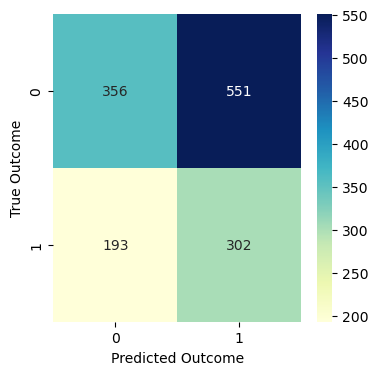

In [19]:
Ext = ExtraTreesClassifier(n_estimators=100) # can adjusted the number of trees by change n_estimators
Ext.fit(X_train, y_train)
y_pred_Ext = Ext.predict(X_eval) # predict our file test data
Ext_acc = accuracy_score(y_eval, y_pred_Ext)
print("Ext accuracy is: {0:.3f}%".format(Ext_acc * 100))
cm = confusion_matrix(y_eval, y_pred_Ext)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xlabel("Predicted Outcome")
plt.ylabel("True Outcome")
plt.show()


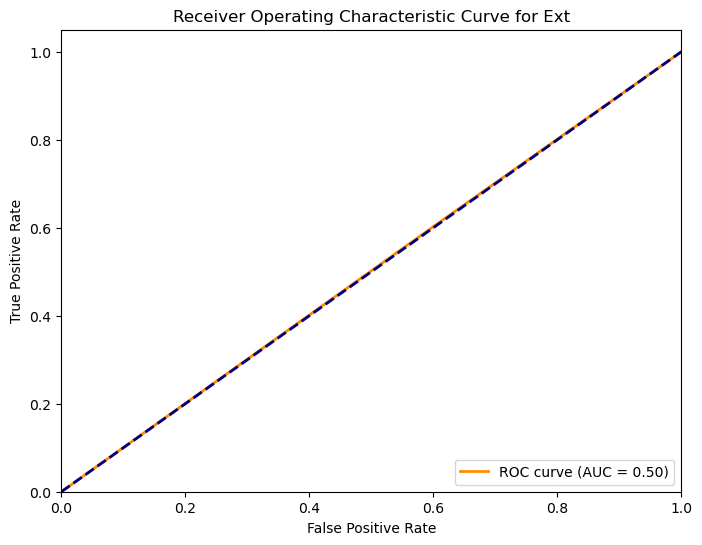

In [20]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_eval, y_pred_Ext)
roc_auc = roc_auc_score(y_eval, y_pred_Ext)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Ext')
plt.legend(loc="lower right")
plt.show()

RF accuracy is: 51.854%


/Users/shuqizhang/miniforge3/envs/newenv/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


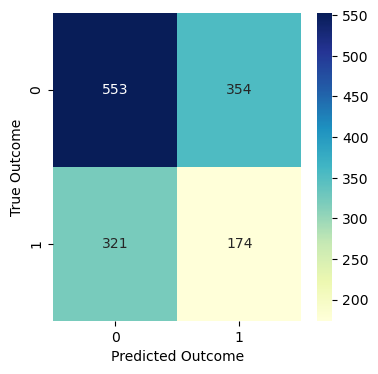

In [21]:
# Random forest
RF = RandomForestClassifier(n_estimators=100) # can adjusted the number of trees by change n_estimators
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_eval) # predict our file test data
RF_acc = accuracy_score(y_eval, y_pred_RF)
print("RF accuracy is: {0:.3f}%".format(RF_acc * 100))
cm = confusion_matrix(y_eval, y_pred_RF)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xlabel("Predicted Outcome")
plt.ylabel("True Outcome")
plt.show()

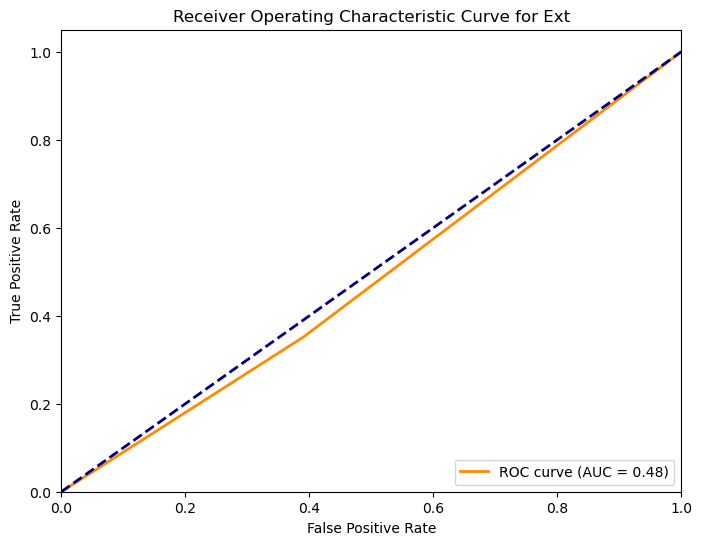

In [22]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_eval, y_pred_RF)
roc_auc = roc_auc_score(y_eval, y_pred_RF)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve for Ext')
plt.legend(loc="lower right")
plt.show()

In [23]:
#####Using K-Fold CV for all the above algrithem
# Define the number of folds for cross-validation
# Perform K-fold cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# ExtraTrees
# Perform K-fold cross-validation
cv_scores_Ext = cross_val_score(Ext, X, y, cv=kf, scoring='accuracy')
# Print the mean accuracy and standard deviation across folds
print("Mean accuracy: {:.3f}".format(cv_scores_Ext.mean()))
print("Standard deviation of accuracy: {:.3f}".format(cv_scores_Ext.std()))

cv_f1_Ext = cross_val_score(Ext, X, y, cv=kf, scoring='f1')
# Print the mean accuracy and standard deviation across folds
print("Mean F1-score: {:.3f}".format(cv_f1_Ext.mean()))
print("Standard deviation of accuracy: {:.3f}".format(cv_f1_Ext.std()))

Mean accuracy: 0.636
Standard deviation of accuracy: 0.019
Mean F1-score: 0.036
Standard deviation of accuracy: 0.013


In [24]:
# Random Forest

# Perform cross-validation
cv_scores_RF = cross_val_score(RF, X, y, cv=kf, scoring='accuracy')

# Print the mean accuracy and standard deviation across folds
print("Mean accuracy: {:.3f}".format(cv_scores_RF.mean()))
print("Standard deviation of accuracy: {:.3f}".format(cv_scores_RF.std()))

cv_f1_RF = cross_val_score(RF, X, y, cv=kf, scoring='f1')
# Print the mean accuracy and standard deviation across folds
print("Mean F1-score: {:.3f}".format(cv_f1_RF.mean()))
print("Standard deviation of accuracy: {:.3f}".format(cv_f1_RF.std()))

Mean accuracy: 0.637
Standard deviation of accuracy: 0.016
Mean F1-score: 0.043
Standard deviation of accuracy: 0.013


Feature 1: 0.055
Feature 2: 0.023
Feature 3: 0.055
Feature 4: 0.055
Feature 5: 0.017
Feature 6: 0.028
Feature 7: 0.011
Feature 8: 0.026
Feature 9: 0.026
Feature 10: 0.055
Feature 11: 0.038
Feature 12: 0.024
Feature 13: 0.029
Feature 14: 0.052
Feature 15: 0.056
Feature 16: 0.055
Feature 17: 0.056
Feature 18: 0.055
Feature 19: 0.051
Feature 20: 0.050
Feature 21: 0.046
Feature 22: 0.025
Feature 23: 0.055
Feature 24: 0.055


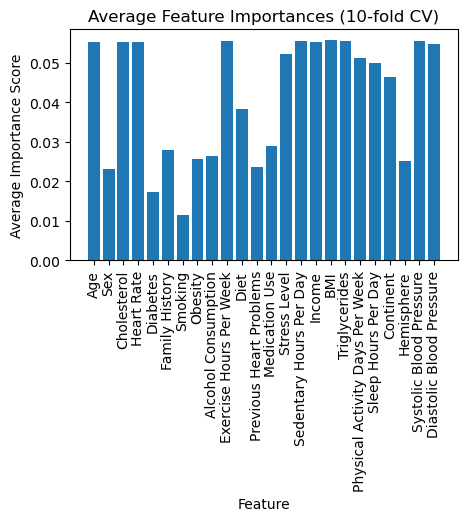

In [25]:
# visualize the average feature importances using a bar plot

# Assuming X is your feature matrix and you have column names
feature_names = list(X.columns)

# Reset the index of the DataFrame
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Initialize an array to store feature importance scores
feature_importances = np.zeros(X.shape[1])

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data for this fold
    Ext.fit(X_train, y_train)
    
    # Accumulate feature importance scores for this fold
    feature_importances += Ext.feature_importances_

# Average feature importance scores across folds
feature_importances /= k_folds

# Optionally, print or visualize the average feature importance scores
# For example, you can print the importance scores for each feature
for i, importance in enumerate(feature_importances):
    print("Feature {}: {:.3f}".format(i+1, importance))

plt.figure(figsize=(5, 3))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.title("Average Feature Importances (10-fold CV)")
plt.xlabel("Feature")
plt.ylabel("Average Importance Score")
plt.xticks(rotation=90)
plt.show()

1. Feature 'BMI': 0.056
2. Feature 'Sedentary Hours Per Day': 0.056
3. Feature 'Triglycerides': 0.055
4. Feature 'Exercise Hours Per Week': 0.055
5. Feature 'Systolic Blood Pressure': 0.055
6. Feature 'Cholesterol': 0.055
7. Feature 'Age': 0.055
8. Feature 'Heart Rate': 0.055
9. Feature 'Income': 0.055
10. Feature 'Diastolic Blood Pressure': 0.055
11. Feature 'Stress Level': 0.052
12. Feature 'Physical Activity Days Per Week': 0.051
13. Feature 'Sleep Hours Per Day': 0.050
14. Feature 'Continent': 0.046
15. Feature 'Diet': 0.038
16. Feature 'Medication Use': 0.029
17. Feature 'Family History': 0.028
18. Feature 'Alcohol Consumption': 0.026
19. Feature 'Obesity': 0.026
20. Feature 'Hemisphere': 0.025
21. Feature 'Previous Heart Problems': 0.024
22. Feature 'Sex': 0.023
23. Feature 'Diabetes': 0.017
24. Feature 'Smoking': 0.011


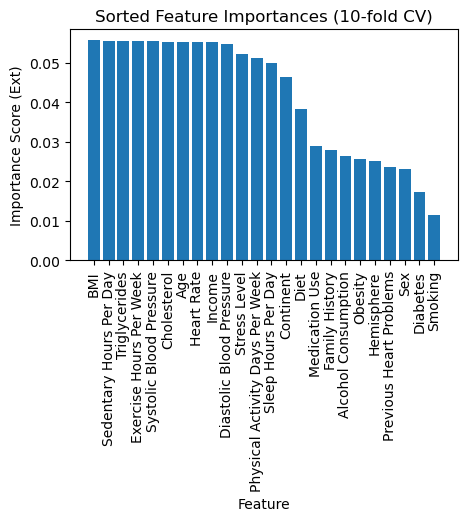

In [26]:
# Zip feature names and importances together
feature_importances_with_names = list(zip(feature_names, feature_importances))

# Sort the zipped list based on importance scores
feature_importances_with_names.sort(key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*feature_importances_with_names)

# Print or visualize the sorted feature importances
for i, (feature_name, importance) in enumerate(zip(sorted_feature_names, sorted_feature_importances)):
    print("{}. Feature '{}': {:.3f}".format(i+1, feature_name, importance))

# Or you can visualize the sorted feature importances using a bar plot
plt.figure(figsize=(5, 3))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Sorted Feature Importances (10-fold CV)")
plt.xlabel("Feature")
plt.ylabel("Importance Score (Ext)")
plt.xticks(rotation=90)
plt.show()

Feature 1: 0.067
Feature 2: 0.011
Feature 3: 0.073
Feature 4: 0.068
Feature 5: 0.010
Feature 6: 0.012
Feature 7: 0.006
Feature 8: 0.012
Feature 9: 0.012
Feature 10: 0.078
Feature 11: 0.020
Feature 12: 0.012
Feature 13: 0.012
Feature 14: 0.043
Feature 15: 0.078
Feature 16: 0.079
Feature 17: 0.078
Feature 18: 0.077
Feature 19: 0.040
Feature 20: 0.036
Feature 21: 0.032
Feature 22: 0.011
Feature 23: 0.070
Feature 24: 0.064


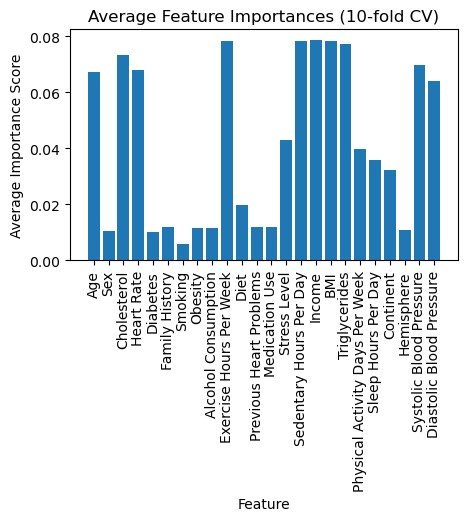

In [27]:
# visualize the average feature importances using a bar plot

# Assuming X is your feature matrix and you have column names
feature_names = list(X.columns)

# Reset the index of the DataFrame
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Initialize an array to store feature importance scores
feature_importances = np.zeros(X.shape[1])

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model on the training data for this fold
    RF.fit(X_train, y_train)
    
    # Accumulate feature importance scores for this fold
    feature_importances += RF.feature_importances_

# Average feature importance scores across folds
feature_importances /= k_folds

# Optionally, print or visualize the average feature importance scores
# For example, you can print the importance scores for each feature
for i, importance in enumerate(feature_importances):
    print("Feature {}: {:.3f}".format(i+1, importance))

plt.figure(figsize=(5, 3))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=feature_names)
plt.title("Average Feature Importances (10-fold CV)")
plt.xlabel("Feature")
plt.ylabel("Average Importance Score")
plt.xticks(rotation=90)
plt.show()

1. Feature 'Income': 0.079
2. Feature 'Sedentary Hours Per Day': 0.078
3. Feature 'BMI': 0.078
4. Feature 'Exercise Hours Per Week': 0.078
5. Feature 'Triglycerides': 0.077
6. Feature 'Cholesterol': 0.073
7. Feature 'Systolic Blood Pressure': 0.070
8. Feature 'Heart Rate': 0.068
9. Feature 'Age': 0.067
10. Feature 'Diastolic Blood Pressure': 0.064
11. Feature 'Stress Level': 0.043
12. Feature 'Physical Activity Days Per Week': 0.040
13. Feature 'Sleep Hours Per Day': 0.036
14. Feature 'Continent': 0.032
15. Feature 'Diet': 0.020
16. Feature 'Family History': 0.012
17. Feature 'Previous Heart Problems': 0.012
18. Feature 'Medication Use': 0.012
19. Feature 'Obesity': 0.012
20. Feature 'Alcohol Consumption': 0.012
21. Feature 'Hemisphere': 0.011
22. Feature 'Sex': 0.011
23. Feature 'Diabetes': 0.010
24. Feature 'Smoking': 0.006


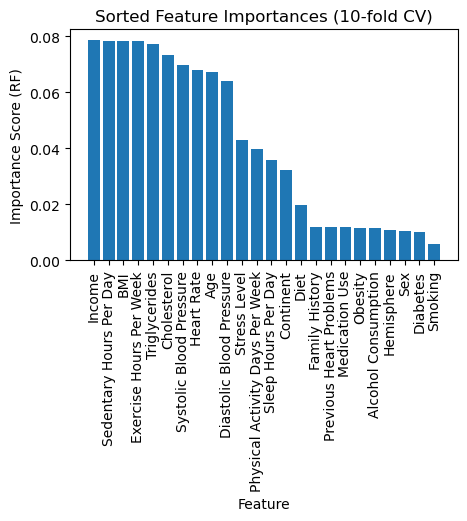

In [28]:
# Zip feature names and importances together
feature_importances_with_names = list(zip(feature_names, feature_importances))

# Sort the zipped list based on importance scores
feature_importances_with_names.sort(key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*feature_importances_with_names)

# Print or visualize the sorted feature importances
for i, (feature_name, importance) in enumerate(zip(sorted_feature_names, sorted_feature_importances)):
    print("{}. Feature '{}': {:.3f}".format(i+1, feature_name, importance))

# Or you can visualize the sorted feature importances using a bar plot
plt.figure(figsize=(5, 3))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.title("Sorted Feature Importances (10-fold CV)")
plt.xlabel("Feature")
plt.ylabel("Importance Score (RF)")
plt.xticks(rotation=90)
plt.show()

In [29]:
### Predict test dataset ###
df_test = test
df_test[['Diastolic Blood Pressure','Systolic Blood Pressure']] = df_test['Blood Pressure'].str.split('/',expand=True)
# save patient id in test data
test_id = df_test['Patient ID']
df_test = df_test.drop(columns=['Patient ID','Blood Pressure','Country'],axis=1)
df_test


,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Diastolic Blood Pressure,Systolic Blood Pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,South America,Southern Hemisphere,158,88
1,84,Male,220,107,0,0,1,1,1,3.427929,...,10.543780,122093,22.221862,370,6,7,Asia,Northern Hemisphere,131,68
2,60,Male,145,71,1,0,1,0,1,1.892559,...,5.994228,234966,29.162319,247,7,7,North America,Northern Hemisphere,160,98
3,45,Male,294,66,0,0,1,1,1,13.693785,...,7.007392,216565,25.120605,360,4,6,Europe,Northern Hemisphere,130,84
4,36,Male,133,97,1,0,1,1,1,3.618009,...,10.963544,223132,22.386804,605,5,10,North America,Northern Hemisphere,161,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,81,Male,137,61,1,0,1,1,0,8.066467,...,6.766948,50533,35.074391,191,3,10,Europe,Southern Hemisphere,143,64
1749,34,Female,304,93,0,1,0,1,1,6.658321,...,6.900037,223874,22.418494,791,4,5,Asia,Northern Hemisphere,102,92
1750,75,Male,176,78,0,0,1,1,1,18.382487,...,6.634988,228009,23.793280,748,5,8,Europe,Southern Hemisphere,102,89
1751,25,Male,307,78,0,1,1,0,1,3.272202,...,10.516775,79211,33.469360,296,7,5,Europe,Southern Hemisphere,137,94


In [30]:
df_test['Diet'] = df_test['Diet'].replace({'Unhealthy':0,'Average':1,'Healthy':2})
df_test['Sex'] = df_test['Sex'].replace({'Male':0,'Female':1})
df_test['Continent'] = df_test['Continent'].replace({'South America':0,'Africa':1,'Asia':2,'Europe':3,'North America':4,'Australia':5})
df_test['Hemisphere'] = df_test['Hemisphere'].replace({'Southern Hemisphere':0,'Northern Hemisphere':1})
df_test

/var/folders/vz/1mv81j7x4vs_hk9ryd7hbp2m0000gn/T/ipykernel_10342/1270016608.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Diet'] = df_test['Diet'].replace({'Unhealthy':0,'Average':1,'Healthy':2})
/var/folders/vz/1mv81j7x4vs_hk9ryd7hbp2m0000gn/T/ipykernel_10342/1270016608.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Sex'] = df_test['Sex'].replace({'Male':0,'Female':1})
/var/folders/vz/1mv81j7x4vs_hk9ryd7hbp2m0000gn/T/ipykernel_10342/1270016608.py:3: FutureWarning: Downcasting behavior in `replace` is 

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Diastolic Blood Pressure,Systolic Blood Pressure
0,67,0,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,0,0,158,88
1,84,0,220,107,0,0,1,1,1,3.427929,...,10.543780,122093,22.221862,370,6,7,2,1,131,68
2,60,0,145,71,1,0,1,0,1,1.892559,...,5.994228,234966,29.162319,247,7,7,4,1,160,98
3,45,0,294,66,0,0,1,1,1,13.693785,...,7.007392,216565,25.120605,360,4,6,3,1,130,84
4,36,0,133,97,1,0,1,1,1,3.618009,...,10.963544,223132,22.386804,605,5,10,4,1,161,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1748,81,0,137,61,1,0,1,1,0,8.066467,...,6.766948,50533,35.074391,191,3,10,3,0,143,64
1749,34,1,304,93,0,1,0,1,1,6.658321,...,6.900037,223874,22.418494,791,4,5,2,1,102,92
1750,75,0,176,78,0,0,1,1,1,18.382487,...,6.634988,228009,23.793280,748,5,8,3,0,102,89
1751,25,0,307,78,0,1,1,0,1,3.272202,...,10.516775,79211,33.469360,296,7,5,3,0,137,94


In [31]:
print("Shape of df_test", df_test.shape)

Shape of df_test (1753, 24)


In [32]:
# Reorder columns in df_test to match the order of X_train
df_test = df_test[X_train.columns]

In [33]:
submission_pred =Ext.predict(df_test)
df_test.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Continent,Hemisphere,Systolic Blood Pressure,Diastolic Blood Pressure
0,67,0,208,72,0,0,1,0,0,4.168189,...,6.615001,261404,31.251233,286,0,6,0,0,88,158
1,84,0,220,107,0,0,1,1,1,3.427929,...,10.543780,122093,22.221862,370,6,7,2,1,68,131
2,60,0,145,71,1,0,1,0,1,1.892559,...,5.994228,234966,29.162319,247,7,7,4,1,98,160
3,45,0,294,66,0,0,1,1,1,13.693785,...,7.007392,216565,25.120605,360,4,6,3,1,84,130
4,36,0,133,97,1,0,1,1,1,3.618009,...,10.963544,223132,22.386804,605,5,10,4,1,90,161


In [34]:
sample_submission['Heart Attack Risk'] = submission_pred
sample_submission.head()

,Patient ID,Heart Attack Risk
0,BMW7812,0
1,XXM0972,0
2,RQX1211,0
3,RVN4963,0
4,NCU1956,0
